<h2>Task 1. Data Selection and Distribution.</h2>
1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?
2. What is the proportion of individuals who purchased organic products?
3. Did you have to fix any data quality problems? Detail them.
4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the organics dataset
df = pd.read_csv('organics.csv')

# show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB
None


In [128]:
def data_exploration():
    X = df.drop(['CUSTID'], axis=1)
    feature_names = X.columns
    
    for i in range(len(feature_names)):
        print()
        print('Attribute: ' + feature_names[i])
        print(df[feature_names[i]].describe())
        print()
        print('Unique values for: ' + feature_names[i])
        print(df[feature_names[i]].unique())
        print()
        print('Value counts for: ' + feature_names[i])
        print(df[feature_names[i]].value_counts())
        print('-----------------------')
        
        
data_exploration()


Attribute: GENDER
count     19711
unique        3
top           F
freq      12149
Name: GENDER, dtype: object

Unique values for: GENDER
['U' 'F' 'M' nan]

Value counts for: GENDER
F    12149
M     5815
U     1747
Name: GENDER, dtype: int64
-----------------------

Attribute: DOB
count          22223
unique         12868
top       1943-07-09
freq               7
Name: DOB, dtype: object

Unique values for: DOB
['1921-09-16' '1949-02-12' '1927-11-27' ... '1963-11-13' '1924-03-24'
 '1922-11-26']

Value counts for: DOB
1943-07-09    7
1946-08-05    7
1940-05-27    7
1950-03-10    7
1938-08-17    6
1938-12-13    6
1933-04-24    6
1955-04-04    6
1946-12-04    6
1943-01-17    6
1930-02-17    6
1943-01-28    6
1947-04-25    6
1938-12-23    6
1938-10-16    6
1940-04-16    6
1938-09-19    6
1945-02-28    6
1924-12-28    6
1953-01-12    6
1938-05-13    6
1945-10-07    6
1937-09-18    6
1957-10-04    6
1942-07-23    6
1949-08-21    6
1951-02-11    6
1943-08-07    6
1933-06-15    6
1946-02-17   

Name: CLASS, dtype: int64
-----------------------

Attribute: ORGYN
count    22223.000000
mean         0.247716
std          0.431696
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ORGYN, dtype: float64

Unique values for: ORGYN
[0 1]

Value counts for: ORGYN
0    16718
1     5505
Name: ORGYN, dtype: int64
-----------------------

Attribute: AFFL
count    21138.000000
mean         8.711893
std          3.421125
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         34.000000
Name: AFFL, dtype: float64

Unique values for: AFFL
[10.  4.  5. 11.  9. 13. 14.  7.  6. 16.  8. nan  3. 15. 12. 19.  2. 17.
 18. 20. 22. 26. 25. 24.  1. 21. 23. 27. 29. 30. 31.  0. 34. 28.]

Value counts for: AFFL
8.0     2634
7.0     2588
9.0     2584
6.0     2234
10.0    2172
11.0    1676
5.0     1662
12.0    1241
4.0      983
13.0     856
14.0     594
3.0      533
15.0     403
16.0     245
2.0      

In [129]:
def data_prep():
    df.drop(['CUSTID', 'DOB', 'EDATE', 'NEIGHBORHOOD','LCDATE'], axis=1)
    
    #Fill in mean values for nan in numeric values, explored that AGE, AFFL and LTIME has NaN. 
    numeric = ['AGE','AFFL' ,'LTIME']
    
    for i in numeric:
        df[i].fillna(df[i].mean(), inplace=True)
    
    #Some values are out of range in AFFL, converting them to mean values
    afflmean = df['AFFL'].mean()
    
    for i in range(len(df['AFFL'])):
        if df['AFFL'][i] < 1 or df['AFFL'][i] > 30:
            # replace all 0, 34, and 31 with mean()
            df['AFFL'].replace(df['AFFL'][i],afflmean, inplace = True)
        
    return df

df2 = data_prep()

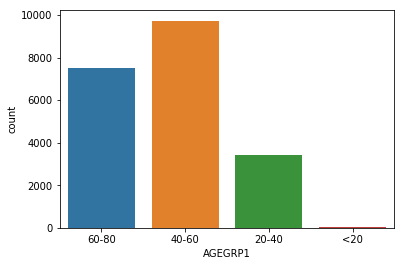

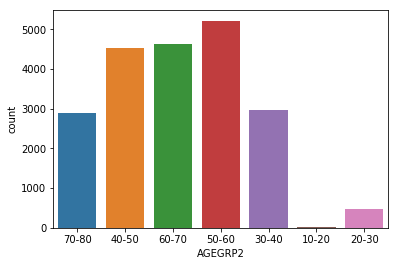

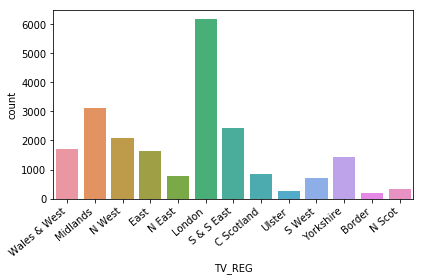

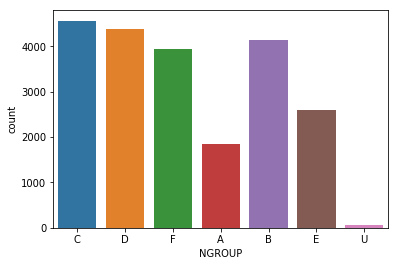

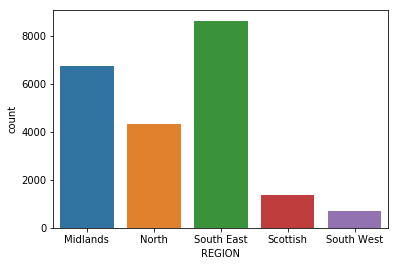

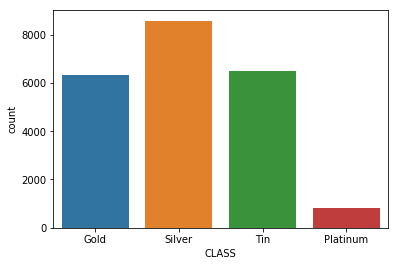

In [130]:
def print_countplot_graph():
    categorical = df2[['AGEGRP1', 'AGEGRP2', 'TV_REG', 'NGROUP', 'REGION', 'CLASS']]
    
    for i in categorical:
        if i == 'TV_REG':
            ax = sns.countplot(data=df2, x=i)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.tight_layout()
            plt.show()
            continue
        
        sns.countplot(data=df2, x=i)
        plt.show()
        
print_countplot_graph()

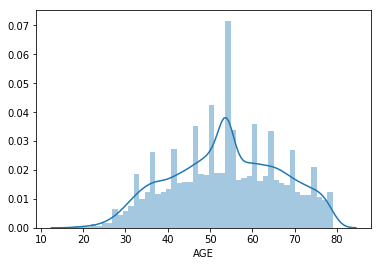

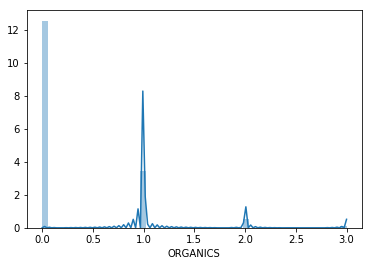

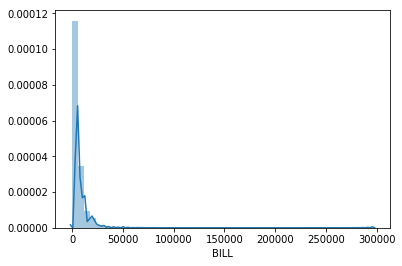

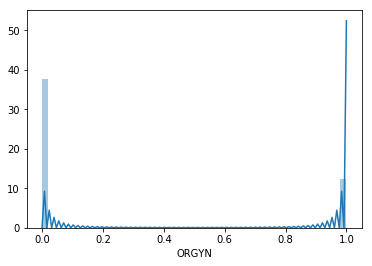

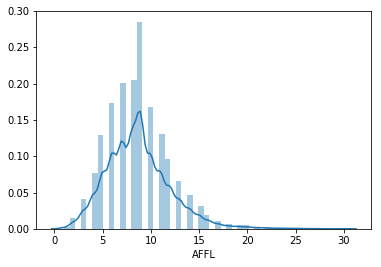

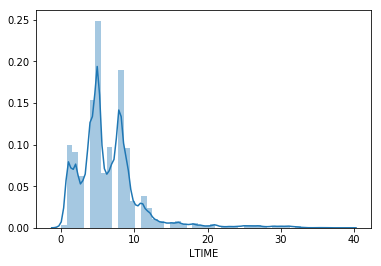

In [131]:
def print_distplot_graph():
    numerical = df2[['AGE', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']]
    
    for i in numerical:
        sns.distplot(df2[i])
        plt.show()
        
print_distplot_graph()

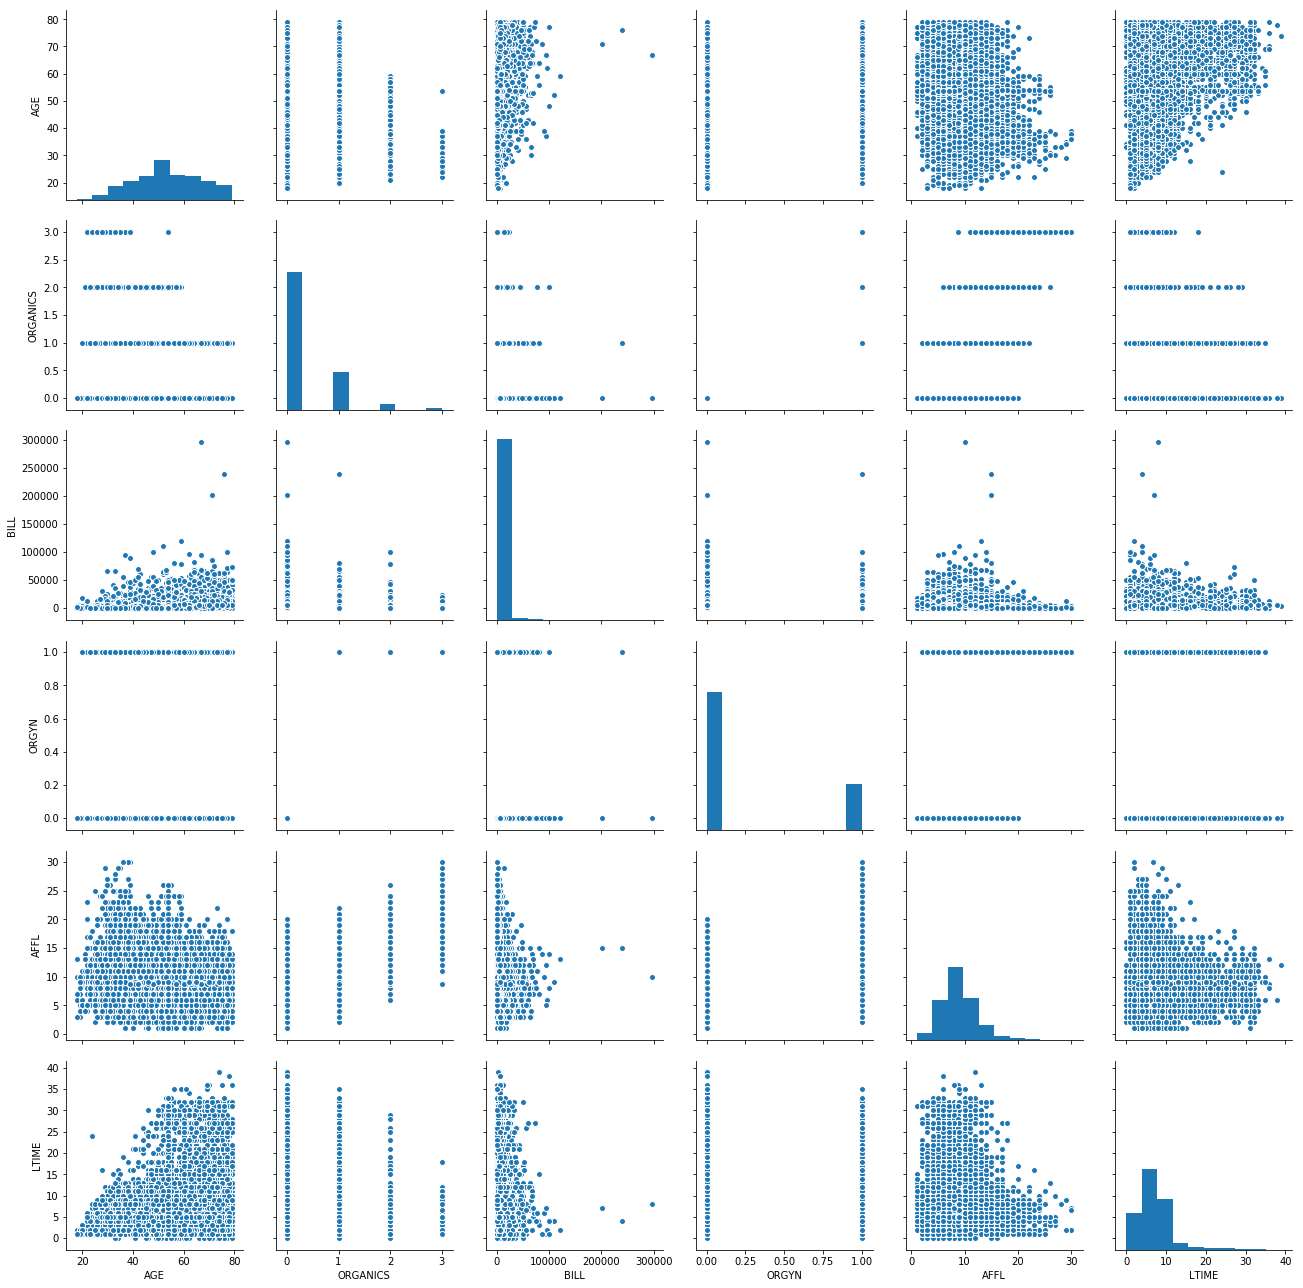

In [132]:
#All the combination chart
temp = df2
sns.pairplot(temp[['AGE', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']], size=3)
plt.show()

In [133]:
#proportion of individuals purchased organic products
# get the value count of each gender
print("Raw count of how many genders bought organic products")
print(df.groupby(['ORGANICS'])['GENDER'].value_counts())

# add normalisation to get the relative frequency
print("Normalised count (percentage) of genders of lapsing and organic products")
print(df.groupby(['ORGANICS'])['GENDER'].value_counts(normalize=True))

Raw count of how many genders bought organic products
ORGANICS  GENDER
0         F         7944
          M         4849
          U         1642
1         F         3539
          M          821
          U           91
2         F          538
          M          118
          U           12
3         F          128
          M           27
          U            2
Name: GENDER, dtype: int64
Normalised count (percentage) of genders of lapsing and organic products
ORGANICS  GENDER
0         F         0.550329
          M         0.335920
          U         0.113751
1         F         0.795102
          M         0.184453
          U         0.020445
2         F         0.805389
          M         0.176647
          U         0.017964
3         F         0.815287
          M         0.171975
          U         0.012739
Name: GENDER, dtype: float64


<h2>Answers to Task 1. Data Selection and Distribution</h2>
This is Camilla Tran's anwers to task 1.

1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?
2. What is the proportion of individuals who purchased organic products?
    - It is an equal proportion of female/male/unknown between product 2 and 3. 0 and 1 ??

3. Did you have to fix any data quality problems? Detail them.
    - Filled in mean values for nan in numeric values, explored that AGE, AFFL and LTIME has NaN. 
    - Some values are out of range in AFFL, converting them to mean values
    - Did not fix categorical values... Dont know how to do that and I dont think it is nececcary.

4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
Dropped:
CUSTID because they are unique.
DOB because it is irrelevant, unøyaktig. AGE is better 
EDATE because it is just one value
NEIGHBORHOOD : Chose NGROUP because it is easier to see a pattern within bigger groups in the beginnning. If I found something interesting in NGROUPS, then I can use NEIGHBORHOOD to explore more specific values. 
LCDATE : Use LTIME because it is more meaningful to see how long they have been members then when they applied. 


5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.